<a href="https://colab.research.google.com/github/NodiraTillayeva/Data-Science-Roadmap/blob/main/EPAM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook is created to present analysis within Data Science Course from EPAM Systems.

**Part 1: EDA (30% max)**
Explore the data:
Univariate analysis: consider features separately, their distribution, descriptive statistics, anomalies, omissions, etc. (15%)

Multivariate analysis: consider features in pairs, try to introduce new features to consider their relationship with other features, correlation, etc. (15%)



### Import necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = '/content/bank-additional-full.csv'
data = pd.read_csv(url, delimiter=';')  # Adjust the delimiter if necessary

### See what we are working with
Display the first few rows of the dataframe

In [4]:
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Descriptive Analysis for the numerical data

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Descriptive Analysis for categorical Data

In [6]:
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Visualizations for Univariate Analysis

### **Age** variable analysis

In [46]:
check_variable="age"

The Distribution Plot

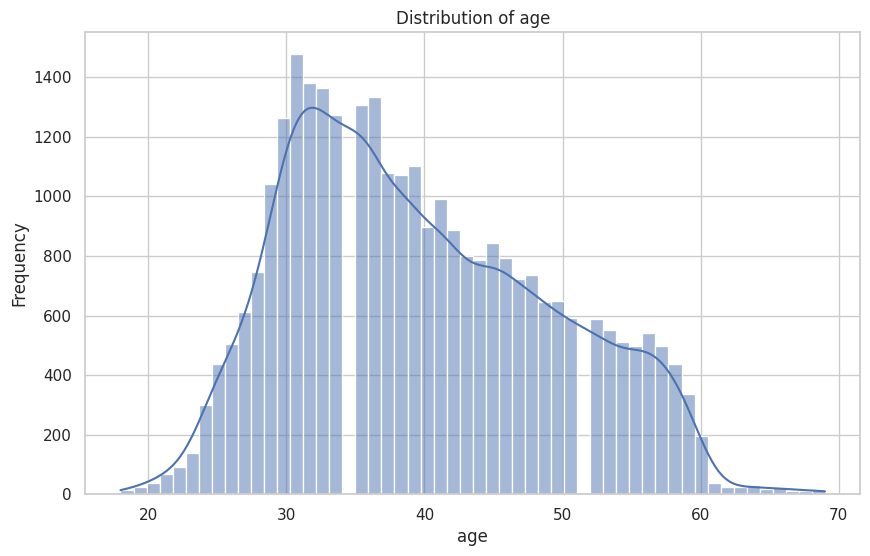

In [47]:
sns.histplot(data[check_variable], kde=True)
plt.title('Distribution of '+check_variable)
plt.xlabel(check_variable)
plt.ylabel('Frequency')
plt.show()

Descriptive Statistics of Age

In [48]:
print(data[check_variable].describe())

count    30362.000000
mean        39.670937
std          9.480143
min         18.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64


Box plot to vizualize anomalies

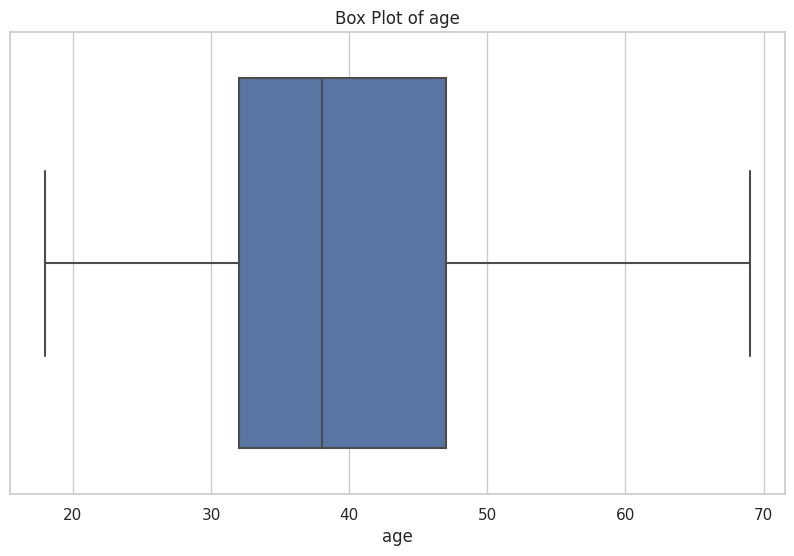

In [49]:
sns.boxplot(x=data[check_variable])
plt.title('Box Plot of '+check_variable)
plt.xlabel(check_variable)
plt.show()

Check for the Unique Values in Categorical Data to see if there are any weird values and deal with them


In [50]:
data[check_variable].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 58, 32, 38, 44, 42, 60, 53, 47, 48, 33, 51, 31, 52, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 66, 68, 63, 62, 65, 64, 67,
       69])

Check for missing values

In [51]:
missing_age = data['age'].isnull().sum()
print(f"Missing values in Age: {missing_age}")

Missing values in Age: 0


### **Job** variable analysis

In [52]:
check_variable="job"

The Distribution Plot

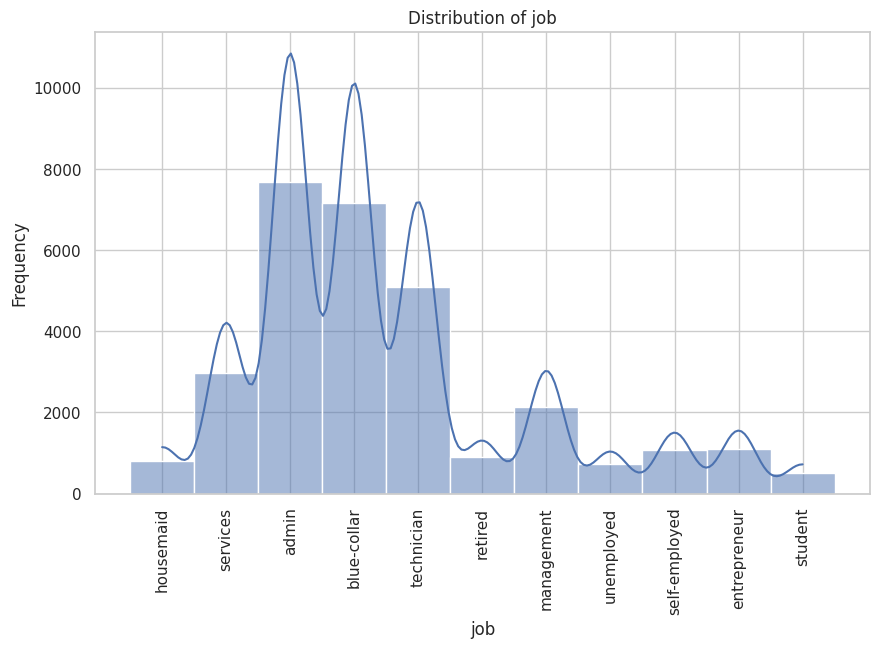

In [59]:
sns.histplot(data[check_variable], kde=True)
plt.title('Distribution of '+check_variable)
plt.xlabel(check_variable)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Descriptive Statistics

In [54]:
print(data[check_variable].describe())

count     30115
unique       11
top       admin
freq       7670
Name: job, dtype: object


Check for the Unique Values in Categorical Data to see if there are any weird values and deal with them


In [55]:
data[check_variable].unique()

array(['housemaid', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

I dont like that "admin." has fullstop so I replace it for consistency

In [56]:
data[check_variable] = data[check_variable].replace('admin.', 'admin')

Check for missing values

In [58]:
missing = data[check_variable].isnull().sum()
print(f"Missing values: {missing}")

Missing values: 247


### **Marital** variable analysis

In [60]:
check_variable="marital"

The Distribution Plot

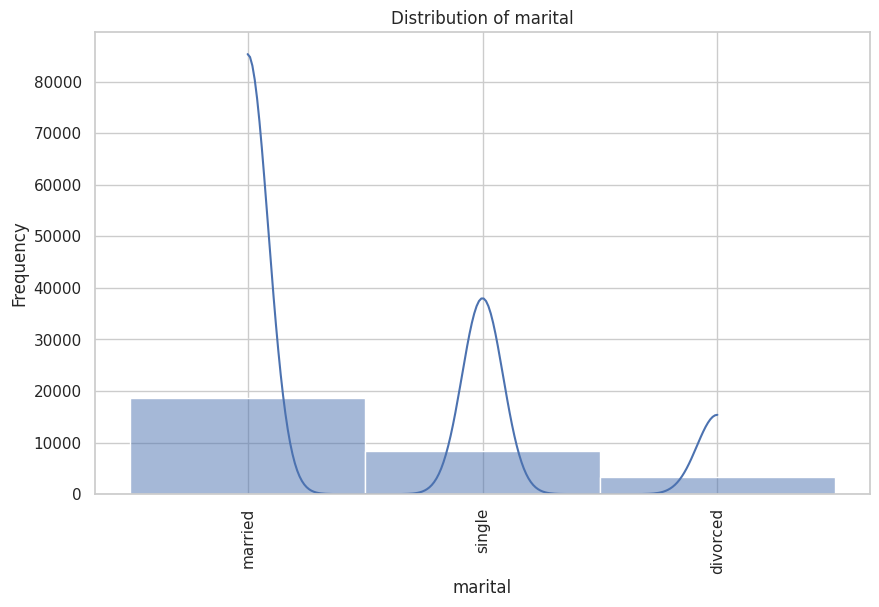

In [61]:
sns.histplot(data[check_variable], kde=True)
plt.title('Distribution of '+check_variable)
plt.xlabel(check_variable)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Descriptive Statistics

In [62]:
print(data[check_variable].describe())

count       30316
unique          3
top       married
freq        18649
Name: marital, dtype: object


Check for the Unique Values in Categorical Data to see if there are any weird values and deal with them


In [63]:
data[check_variable].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

Check for missing values

In [64]:
missing = data[check_variable].isnull().sum()
print(f"Missing values: {missing}")

Missing values: 46


### **Education** variable analysis

In [65]:
check_variable="education"

The Distribution Plot

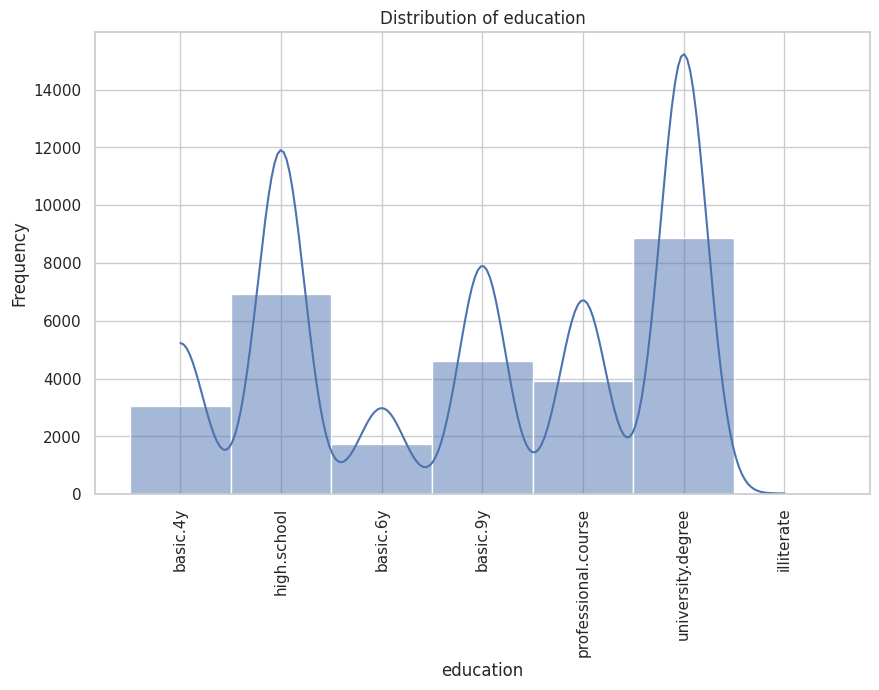

In [66]:
sns.histplot(data[check_variable], kde=True)
plt.title('Distribution of '+check_variable)
plt.xlabel(check_variable)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Descriptive Statistics

In [67]:
print(data[check_variable].describe())

count                 29130
unique                    7
top       university.degree
freq                   8879
Name: education, dtype: object


Check for the Unique Values in Categorical Data to see if there are any weird values and deal with them


In [68]:
data[check_variable].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

Check for missing values

In [69]:
missing = data[check_variable].isnull().sum()
print(f"Missing values: {missing}")

Missing values: 1232


### **Default** variable analysis

In [70]:
check_variable="default"

The Distribution Plot

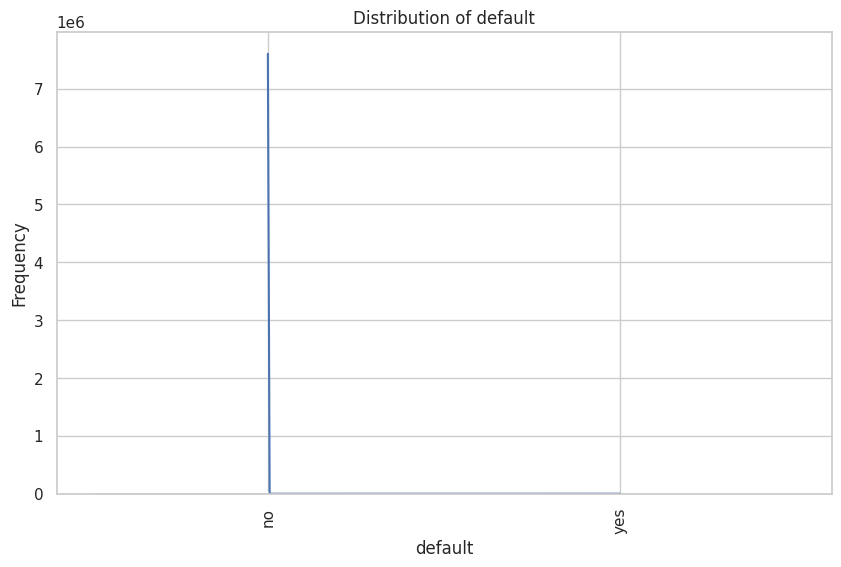

In [71]:
sns.histplot(data[check_variable], kde=True)
plt.title('Distribution of '+check_variable)
plt.xlabel(check_variable)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Descriptive Statistics

In [72]:
print(data[check_variable].describe())

count     23498
unique        2
top          no
freq      23496
Name: default, dtype: object


Check for the Unique Values in Categorical Data to see if there are any weird values and deal with them


In [73]:
data[check_variable].unique()

array(['no', nan, 'yes'], dtype=object)

Check for missing values

In [74]:
missing = data[check_variable].isnull().sum()
print(f"Missing values: {missing}")

Missing values: 6864


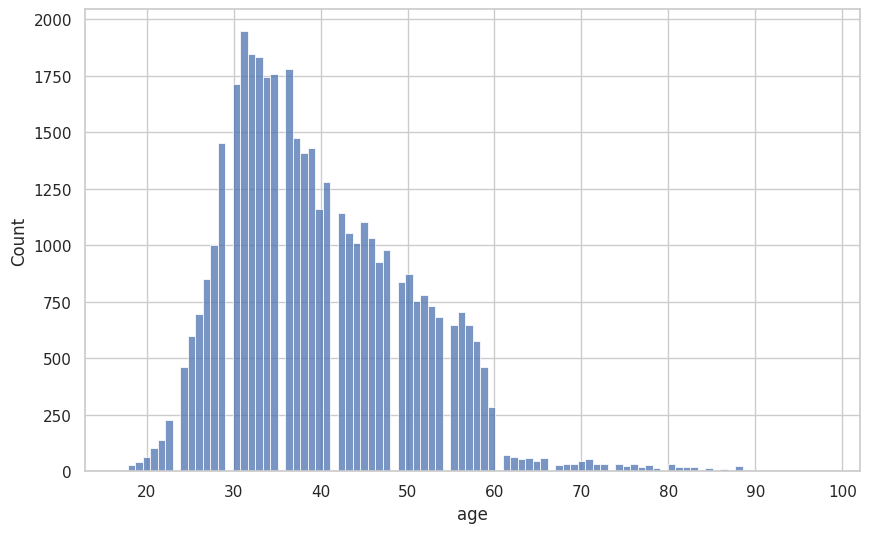

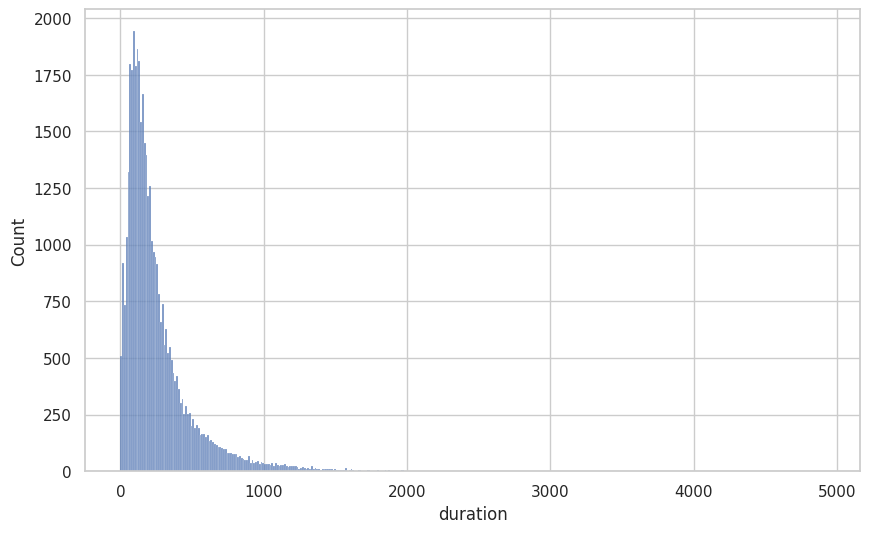

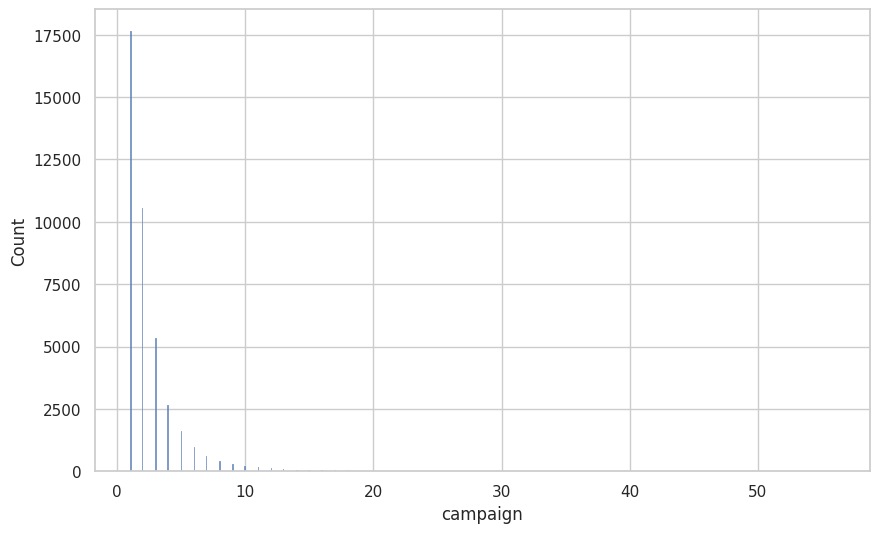

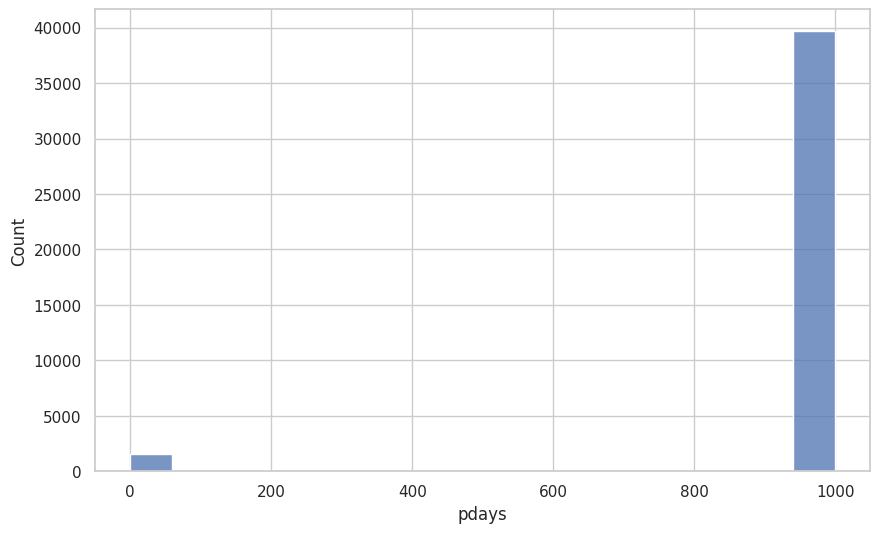

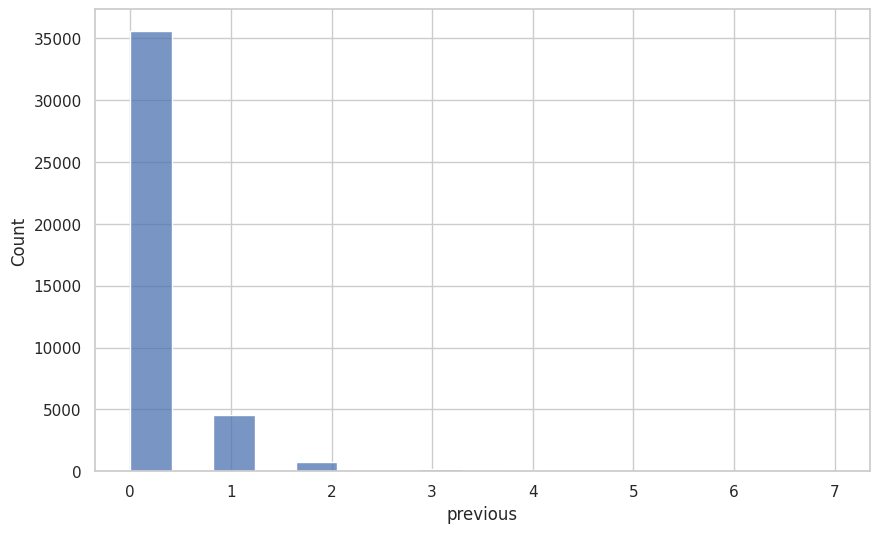

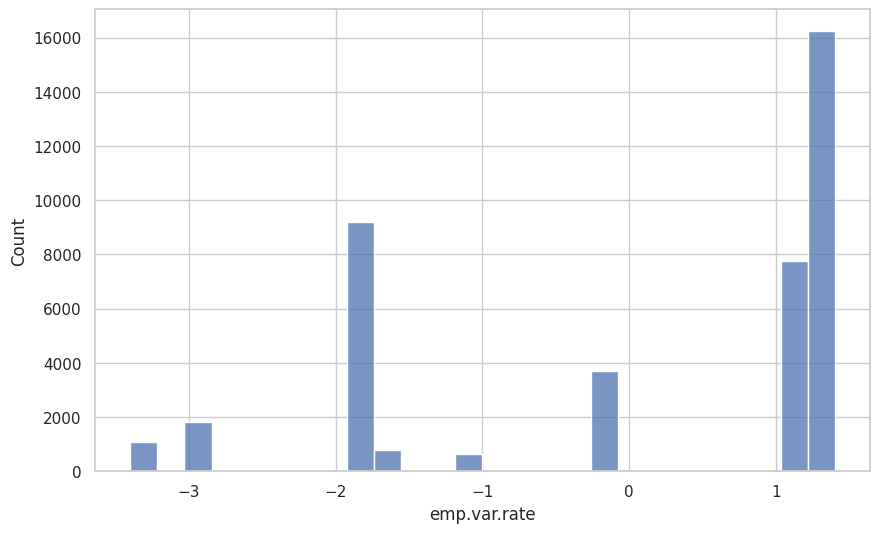

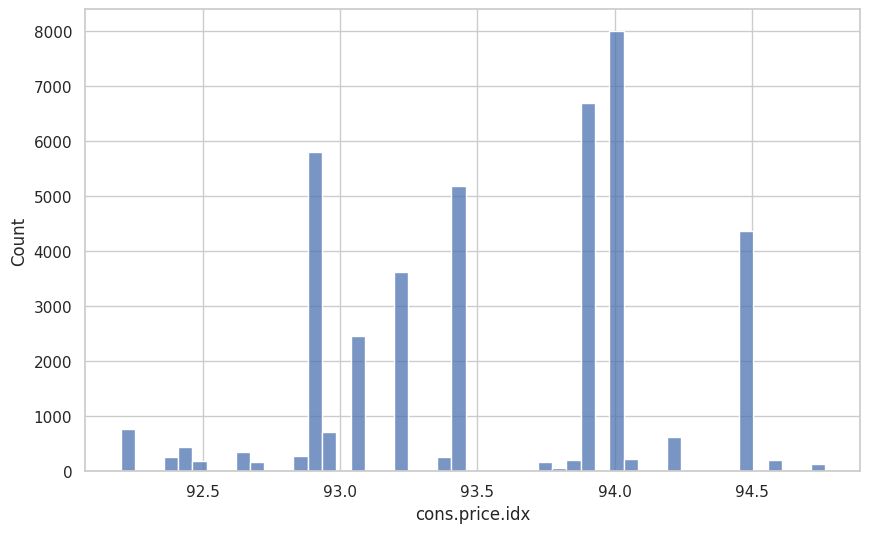

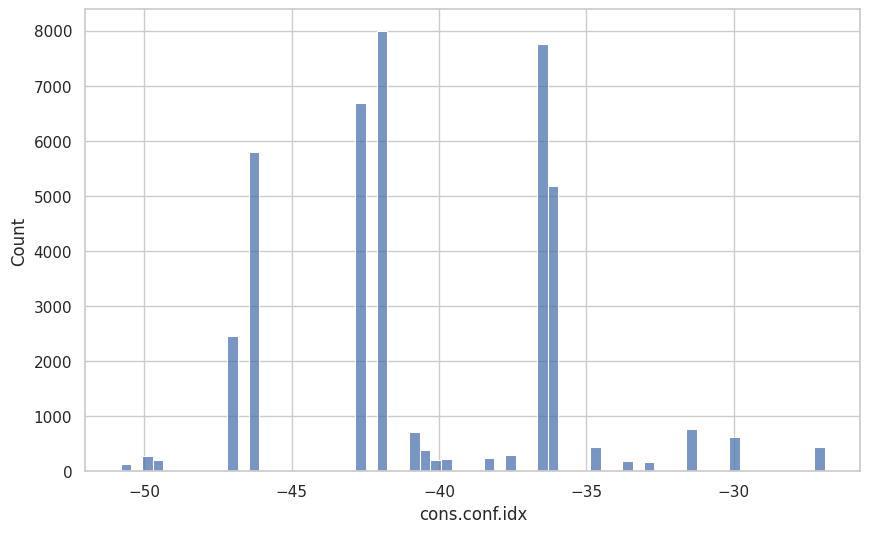

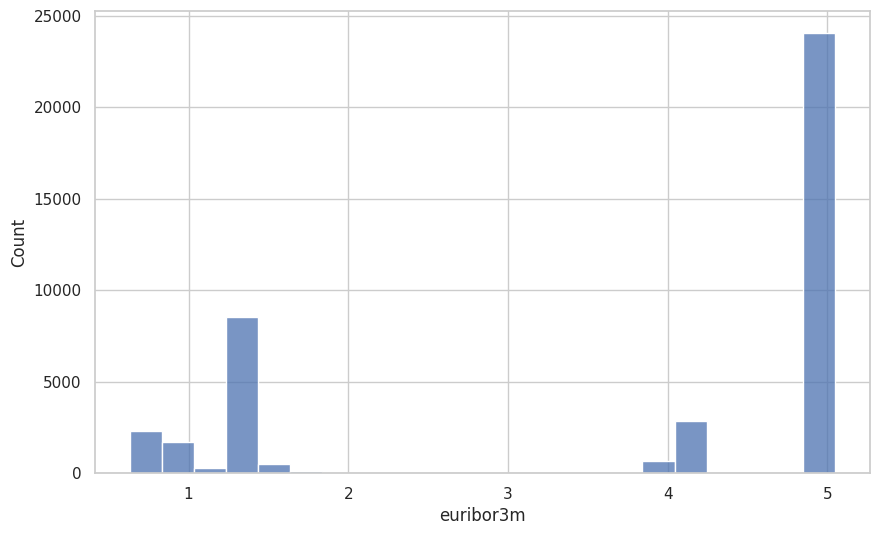

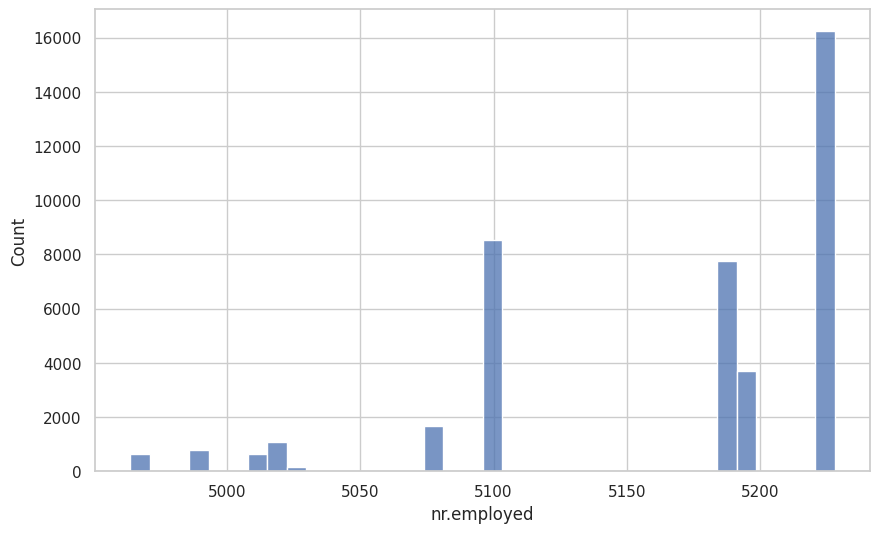

In [7]:
for column in data.select_dtypes(include=['int', 'float']):
    sns.histplot(data[column])
    plt.show()

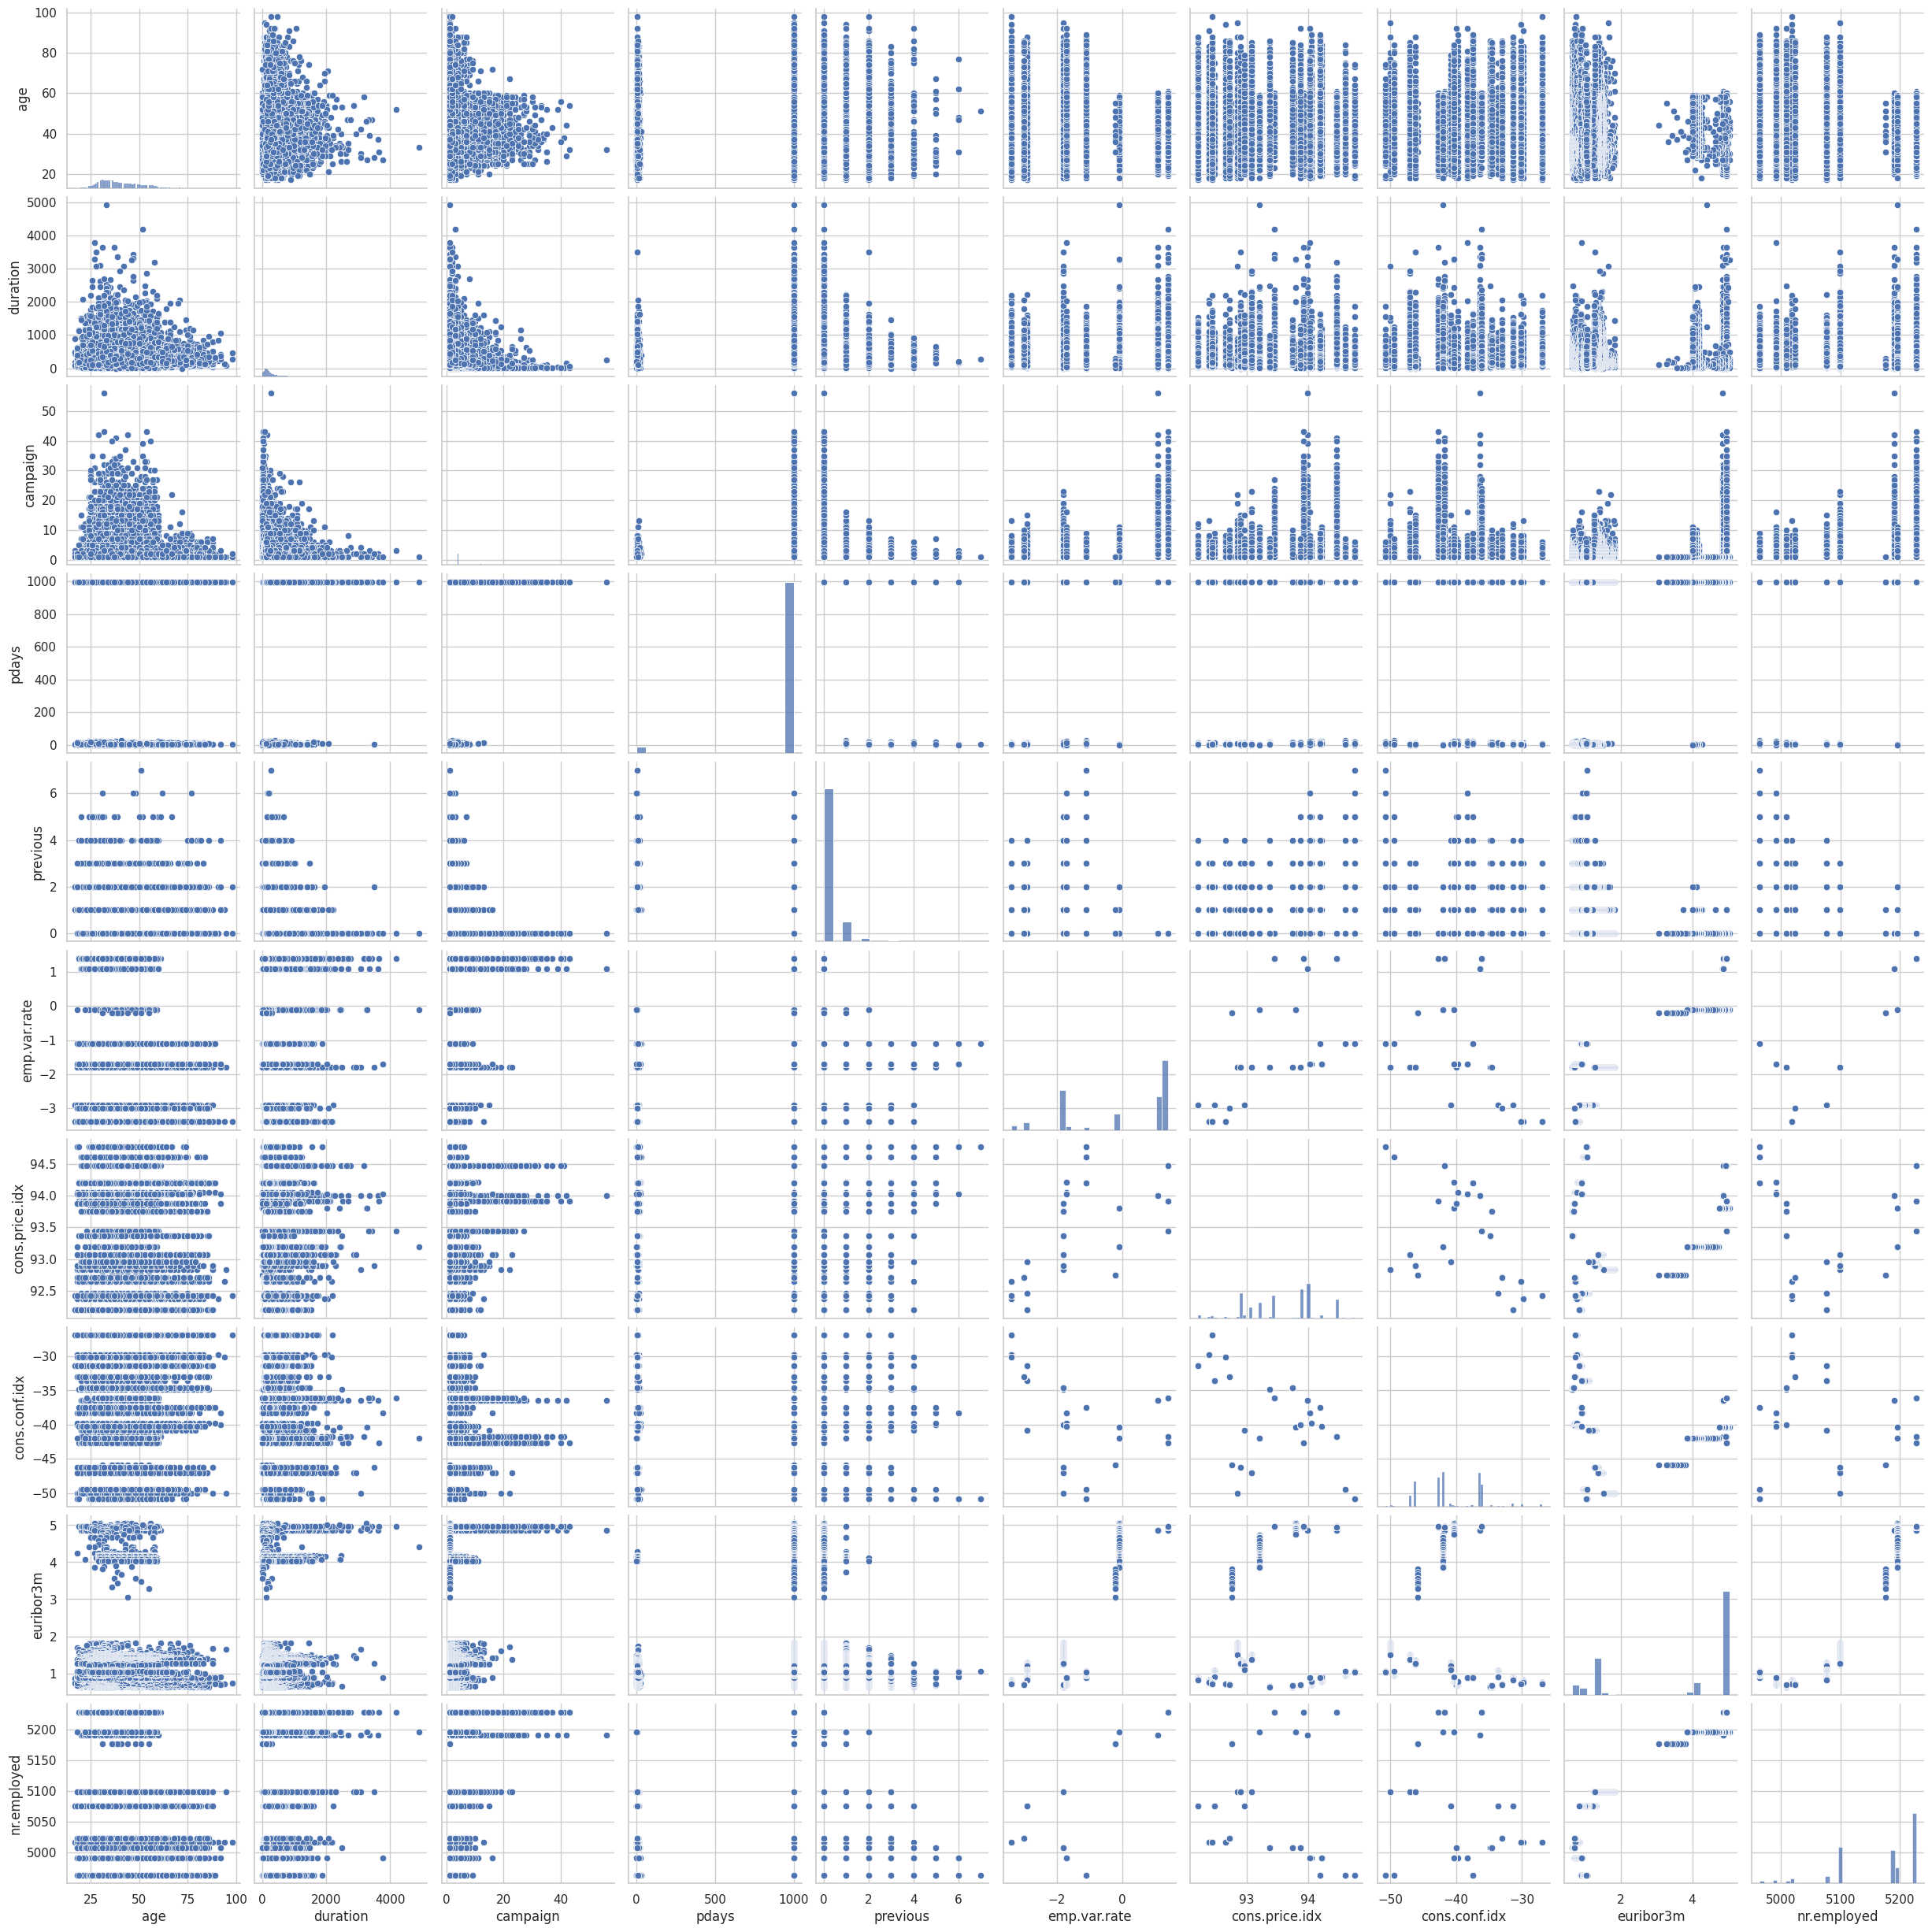

In [8]:
# Cell 5: Pairplot or correlation matrix
sns.pairplot(data)
plt.show()

<ipython-input-9-5c1800b252c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


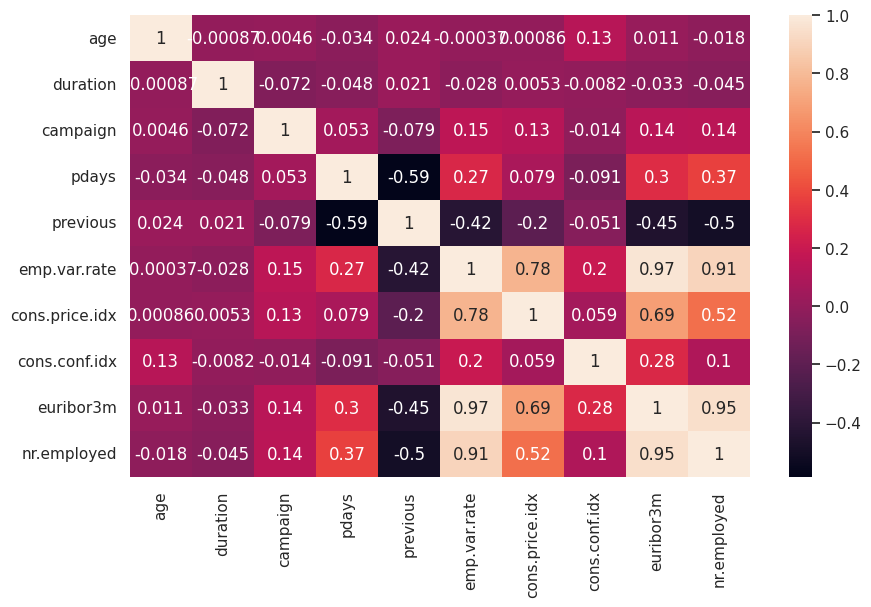

In [9]:
# Cell 6: Correlation Matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
# Checking for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

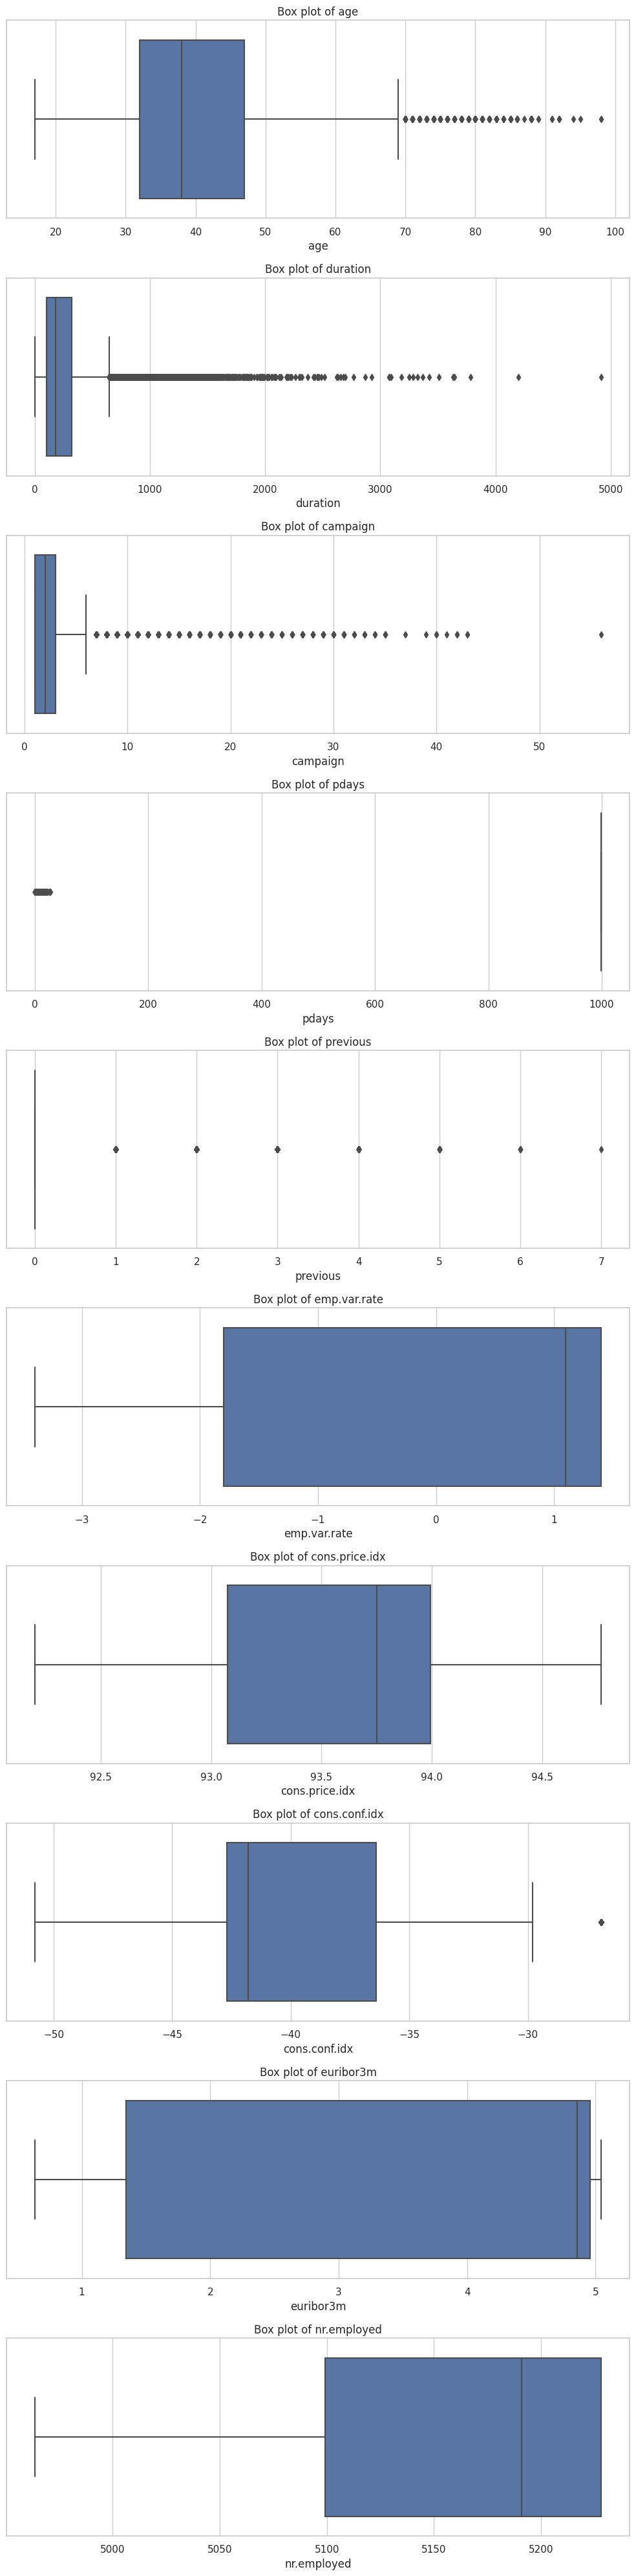

In [ ]:
# Boxplots for detecting outliers
fig, ax = plt.subplots(len(num_features), 1, figsize=(10, len(num_features)*4))
for i, col in enumerate(num_features):
    sns.boxplot(x=data[col], ax=ax[i])
    ax[i].set_title('Box plot of ' + col)
plt.tight_layout()

In [ ]:
# Print all column names
print(data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


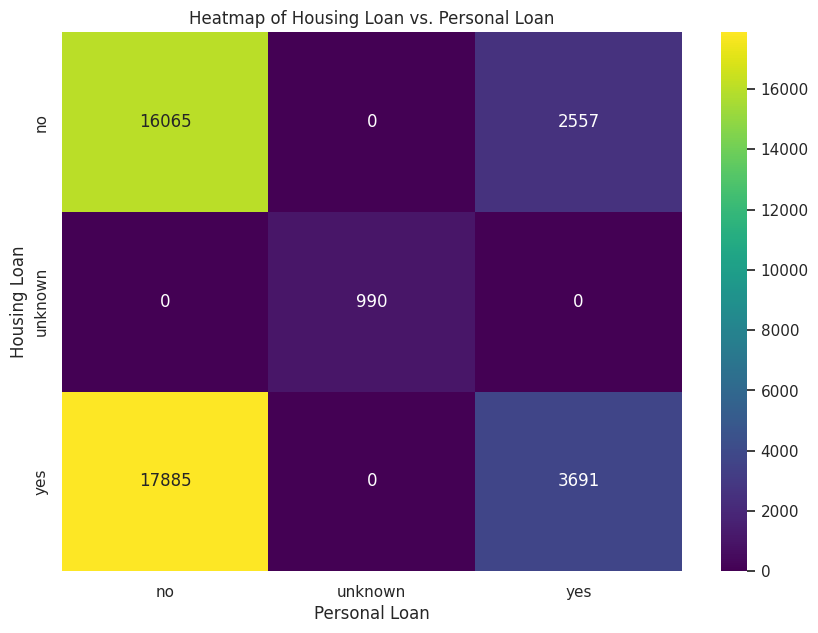

In [ ]:
# Create a cross tabulation table
cross_tab = pd.crosstab(data['housing'], data['loan'])

# Create a heatmap from the cross tabulation
plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Housing Loan vs. Personal Loan')
plt.ylabel('Housing Loan')
plt.xlabel('Personal Loan')
plt.show()

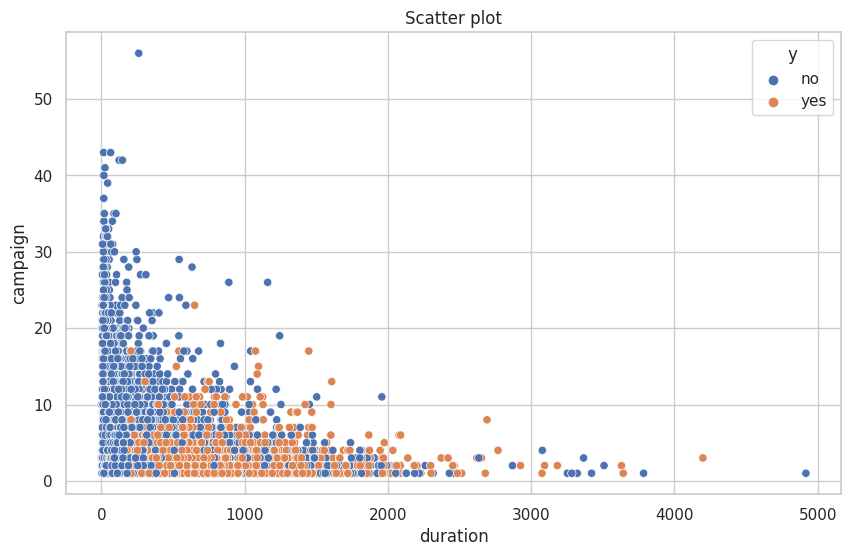

In [ ]:
sns.scatterplot(data=data, x="duration", y="campaign", hue="y")
plt.title("Scatter plot")
plt.show()

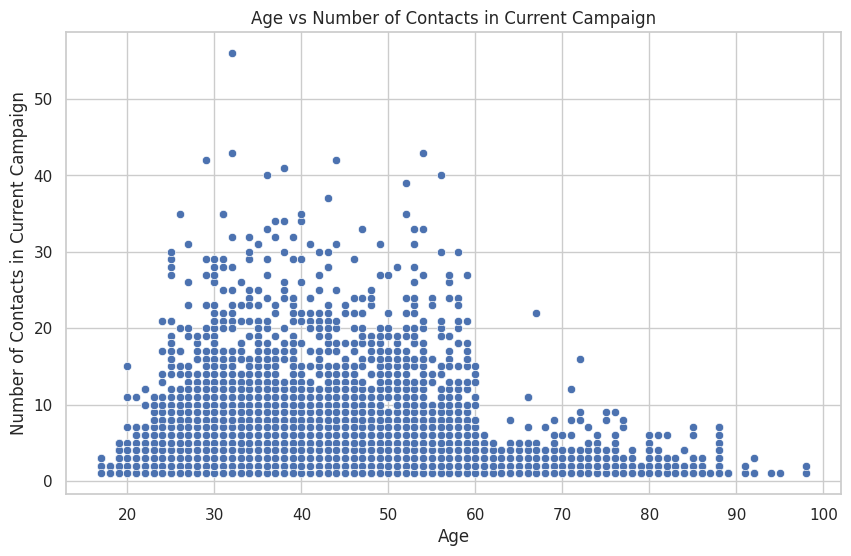

In [ ]:
# Scatter plot for Age vs Campaign
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='campaign', data=data)
plt.title('Age vs Number of Contacts in Current Campaign')
plt.xlabel('Age')
plt.ylabel('Number of Contacts in Current Campaign')
plt.show()

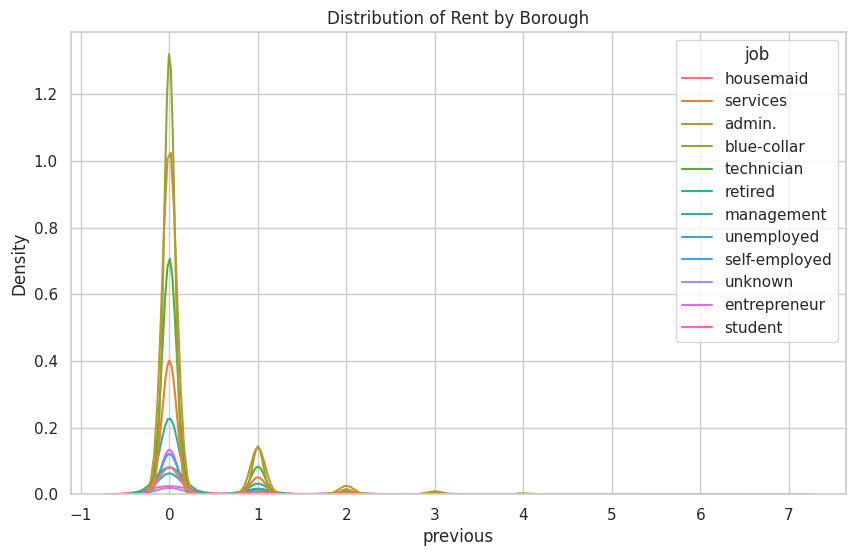

In [ ]:
sns.kdeplot(data=data, x="previous", hue="job")
plt.title("Distribution of Rent by Borough")
plt.show()

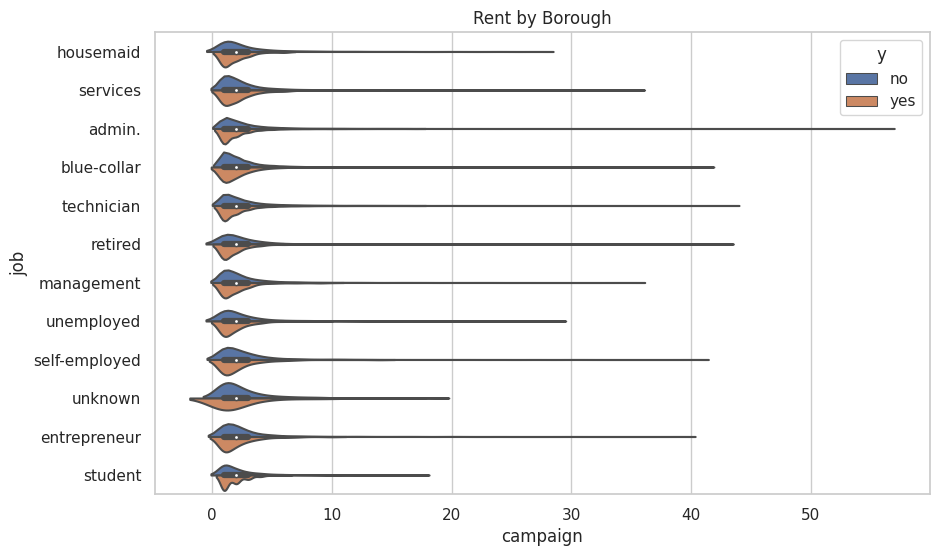

In [ ]:
sns.violinplot(
    y="job",
    x="campaign",
    data=data,
    hue="y",
    split=True)
plt.title("Rent by Borough")
plt.show()

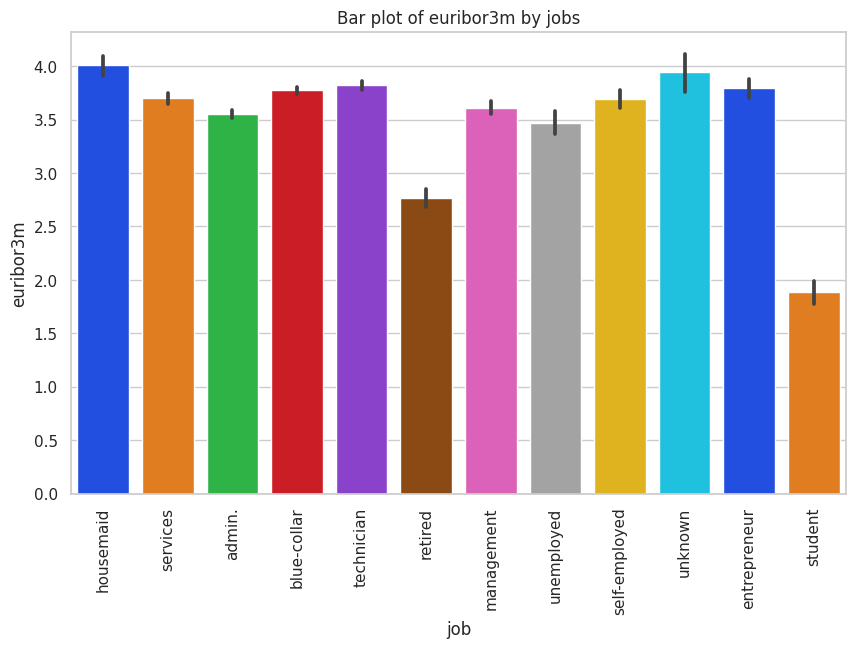

In [ ]:
sns.barplot(x = "job", y="euribor3m", data=data, palette="bright")
plt.xticks(rotation = 90)
#hue="has_gym",
plt.title("Bar plot of euribor3m by jobs")
plt.show()

# Data Preparation


In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# Replace 'unknown' with NaN in the dataset
data.replace('unknown', np.nan, inplace=True)

In [17]:
# Replace 'unknown' with NaN in the dataset
data.replace('nonexistent', np.nan, inplace=True)

In [19]:
# Replace 'unknown' with NaN in the dataset
data.replace( 999, np.nan, inplace=True)

In [20]:
data.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
# Cell 12: Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.select_dtypes(include=['int', 'float']))

ValueError: ignored

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
# Imputers for numerical and categorical data
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = cat_imputer.fit_transform(data[[column]])
    else:
        data[column] = num_imputer.fit_transform(data[[column]])

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Scaler for numerical variables (choose one)
scaler = MinMaxScaler() # or StandardScaler()

# Scale numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data.tail(400)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
40788,0.628571,1.000000,0.6,0.0,0.0,0.479167,0.778644,0.557652,0.055316,0.0,...,0,0,1,0,1,0,0,0,0,0
40789,0.209524,0.096199,0.2,0.0,0.0,0.479167,0.778644,0.557652,0.055316,0.0,...,0,0,1,0,1,0,0,0,0,0
40790,0.380952,0.240497,0.0,0.0,0.0,0.479167,0.778644,0.557652,0.055316,0.0,...,0,0,1,0,1,0,0,0,0,0
40791,0.171429,0.493406,0.0,0.0,0.0,0.479167,0.778644,0.557652,0.055316,0.0,...,0,0,1,0,1,0,0,0,1,0
40792,0.209524,1.000000,0.0,0.0,0.0,0.479167,0.778644,0.557652,0.055316,0.0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.000000,0.518231,0.0,0.0,0.0,0.479167,1.000000,0.000000,0.089322,0.0,...,1,0,0,0,0,0,0,1,0,1
41184,0.552381,0.594259,0.0,0.0,0.0,0.479167,1.000000,0.000000,0.089322,0.0,...,1,0,0,0,0,0,0,1,0,0
41185,0.742857,0.293251,0.2,0.0,0.0,0.479167,1.000000,0.000000,0.089322,0.0,...,1,0,0,0,0,0,0,1,0,0
41186,0.514286,0.685803,0.0,0.0,0.0,0.479167,1.000000,0.000000,0.089322,0.0,...,1,0,0,0,0,0,0,1,0,1
